<a href="https://colab.research.google.com/github/Ayanlola2002/DATA-SCIENCE-PROJECTS/blob/master/Task5_Puma_Rhodesville_ZimbabweOmdena1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import zipfile

import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

import os

In [ ]:
## Functions to use

def read_data(datafile, dateCol):
    ''' Read the excel file'''
    df = pd.read_excel(datafile, index_col= dateCol, parse_dates=True)
    return df
    
def info_data(datafile, info = False, head = True, shape = True):
    ''' Look at the info of the data'''
    
    if not isinstance(datafile, pd.DataFrame):
        df = read_data(datafile)
    else:
        df = datafile
    
    ## Information of data
    if info:
        df.info()
        
    print('--------------------------------------------------------------------')
    print('First rows')
    # Show first rows
    if head:
        print(df.head())
        
    print('--------------------------------------------------------------------')
    print('Dimension of the data')
    ## Dimension of data
    if shape:
        print(f'This data has {df.shape[0]} rows and {df.shape[1]} variables') 
        
        
def find_unique(df, col):
    ''' Find the unique values of a columns'''
    return df[col].nunique()

### Look at the statistical description of data
def describe(df, col = None):
    ''' Give the statistic summary'''
    
    ## Summary statistic
    if col is not None:
        stat = df[col].describe()
    else:
        stat = df.describe()

    ## Change the name of the 50% index to median
    idx = stat.index.tolist()
    idx[5] = 'median'
    stat.index = idx
    return stat

def missing_val(data):
    ''' Find the percentage of missing values
    on each column of a dataframe'''
    
    ## percentage of missing values
    n = data.isnull().sum().sort_values(ascending=False)/ len(data) * 100
    return n
  
def boxHist(df, col):
    ''' Create the boxplot and histogram'''
    ## Setup for ploting two charts one over the other
    fig, ax = plt.subplots(2, 1, figsize = (10,6))
    
    ## First a box plot
    df.dropna().boxplot(col, ax = ax[0], vert=False, return_type='dict')
    
    ## Plot the histogram
    temp = df[col].values
    ax[1].hist(temp, bins = 75)
    plt.xlabel(col)
    return [col]

def valCount(data, col, perc = False):
    ''' calculate the proportion in fraction or percentage'''
    if not perc:
      return data[col].value_counts()
    else:
      return data[col].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'    
    
def make_chart_histogram(data, col = None, subplots=True, layout = None, figsize = None, sharex = False, bins = None):
    ''' Create histogram from numerical variable'''
    
    if col is not None:
        return df[col].hist(bins = bins)
    else:
        return data.plot.hist(subplots=True, layout = layout, figsize = figsize, sharex=False, bins = bins)
    
    
def plotCounts(data, col, kind = 'barh', perc = False):
    ''' Plot the proportion of a categorical variables'''
    if not perc:
        return data[col].value_counts().plot(kind = kind)
    else:
        return data[col].value_counts(normalize = True).mul(100).round(2).plot(kind = kind)

    
def convert_date(df, column_name):
    return pd.to_datetime(df[column_name])

def convertTime(df, column_name):
    return pd.to_timedelta(df[column_name])

def date_cols(data, col):
    ''' Create year, month, month name and day from a datetime column'''
    #data[col] = convert(data, col)
    
    data['Year'] = pd.DatetimeIndex(data[col]).year
    data['Month'] = pd.DatetimeIndex(data[col]).month
    data['Day'] = pd.DatetimeIndex(data[col]).day
    data['weekday'] = pd.DatetimeIndex(data[col]).weekday
    data['weekday_name'] = pd.DatetimeIndex(data[col]).day_name()
    data['Hour'] = pd.DatetimeIndex(data[col]).hour

    return data    


### plots groupbyfunction
def plots(data, col1 , col2, func, title, t = 'line'):
    ''' Plotting plots from groupby'''
    
    data.groupby(col1)[col2].agg(func).plot(kind = t)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(title)

def groupDat(data, col1 , col2, func):
    ''' Create groupby'''
    
    return data.groupby(col1)[col2].agg(func)     

In [ ]:
def create_season(row):
    ''' create season'''
    if row['Month'] in (1, 2, 12):
        return "Winter"
    elif row['Month'] in (3, 4, 5):
        return "Spring"
    elif row['Month'] in (6, 7, 8):
        return "Summer"
    elif row['Month'] in (9, 10, 11):
        return "Fall"
    else:
        return "Other"

def DataandResampling(data, col_date, target, resamplingperiod, label):
    ''' Plot the whole data vs. resampling mean'''
    
    if data[col_date].dtypes == 'datetime64':
        data[col_date] = data[col_date]
    else:
        data[col_date] = pd.to_datetime(data[col_date])

    ## Set the index to date 
    data = data.set_index(col_date) 
        
    ## plot figure    
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(data[target], marker='.', linestyle='-', linewidth=0.5, label=label)
    ax.plot(data[target].resample(resamplingperiod).mean(), marker='o', markersize=6, linestyle='-', label= resamplingperiod + 'ly' + ' Mean Resample')
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_ylabel(target)
    ax.legend(loc = 'upper right')


def YearlyDailyAgg(data, col_date, target, period):
    ''' Aggregate target by year, season, week using date column'''
    
    if data[col_date].dtypes == 'datetime64':
        data[col_date] = data[col_date]
    else:
        data[col_date] = convert_date(data, col_date)
        
    ## plot figure    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 20))
    fig.subplots_adjust(hspace=0.6, wspace=0.4)

    
    ## Create time features
    date_cols(data, col_date)
    
    data['weekend'] = np.where((data['weekday'] == 5) | (data['weekday'] == 6), 1 ,0) 
    data['season'] = data.apply(create_season, axis = 1)
    

    data.groupby(period)[target].mean().plot.bar(ax = ax1)
    ax1.set_xlabel(period)
    ax1.set_ylabel(target + ' avg')
    ax1.set_title(f'{period} {target} avg')

    ### Mean, median and std of each year
    data.groupby(period).agg({target: ['mean', 'median', 'std']}).plot.bar(ax = ax2)
    ax2.set_title(target +' mean/median/std')
    ax2.set_ylabel(target + ' avg')
    ax2.legend(loc = "best", labels = ['Mean', 'Median', 'Std']);

    ### Consumption by HOUR
    data.groupby(['Hour', period])[target].mean().unstack().plot(style=[':', '--', '-'], ax = ax3)
    ax3.set_title(f'{period} {target} avg by HOUR')
    ax3.set_ylabel(target + ' avg')
    ax3.set_xlim((0,25))

        
        
def MonthlyWeeklyAgg(data, col_date, target, period):
    ''' Aggregate by month, week or day'''
    
    if data[col_date].dtypes == 'datetime64':
        data[col_date] = data[col_date]
    else:
        data[col_date] = convert_date(data, col_date)
        
    ## plot figure    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 20))
    fig.subplots_adjust(hspace=0.6, wspace=0.4)

            
    ## Create time features
    date_cols(data, col_date)


    order_month = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

    order_week = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
    
    
    if period == 'Month':
        data["Month_name"] = data[period].map({1:"JAN", 2:"FEB",3:"MAR",4:"APR",5:"MAY",6:"JUN",
                                            7:"JUL",8:"AUG",9:"SEP",10:"OCT",11:"NOV",12:"DEC"
                                               })
        data.groupby('Month_name')[target].mean().reindex(index = order_month).plot.bar(ax = ax1)
        
        ### Mean, median and std of each year
        data.groupby('Month_name').agg({target: ['mean', 'median', 'std']}).reindex(index = order_month).plot(style=[':', '--', '-'],
                                                                                                            ax = ax2)
        
        ### Period consumption by HOUR
        df_hour = data.groupby(['Hour', 'Month_name'])[target].mean().unstack()
        df_hour = df_hour[order_month]
        df_hour.columns.name = None
        sns.heatmap(df_hour, cmap="YlGnBu", ax = ax3)
        
    elif period == 'weekday':
        data['weekday_name'] = data[period].map({0:'Mon', 1:'Tues', 2:'Wed', 3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'})
        data.groupby('weekday_name')[target].mean().reindex(index = order_week).plot.bar(ax = ax1)

        ### Mean, median and std of each week
        data.groupby('weekday_name').agg({target: ['mean', 'median', 'std']}).reindex(index = order_week).plot(style=[':', '--', '-'],
                                                                                                            ax = ax2)
        
        ### Period EA by HOUR
        data.groupby(['Hour', 'weekday_name'])[target].mean().unstack().plot(style=[':', '--', '-'], ax = ax3)
        ax3.set_title(f'{period} {target} avg')
        ax3.set_ylabel(target + ' avg')
        
    else:
        data.groupby(period)[target].mean().plot(ax = ax1)

        ### Mean, median and std of each year
        data.groupby(period).agg({target: ['mean', 'median', 'std']}).plot(style=[':', '--', '-'], ax = ax2)

    
        ### Period consumption by HOUR
        df_hour = data.groupby(['Hour', period])[target].mean().unstack()
        df_hour.columns.name = None
        sns.heatmap(df_hour, cmap="YlGnBu", ax = ax3)
        
    ax1.set_xlabel(period)
    ax1.set_ylabel(target + ' avg')
    ax1.set_title(f'{period} {target} avg') 
    
    ax2.set_title(target + ' mean/median/std')
    ax2.set_xlabel('')
    ax2.set_ylabel(target + ' avg')
    ax2.legend(loc = "best", labels = ['Mean', 'Median', 'Std'])
  

In [ ]:
def TSAggregationEda(data, col_date, target, period):
    ''' Create time series EDA'''
   
    if period in ('Year', 'season', 'weekend'):
        YearlyDailyAgg(data, col_date, target, period)
    else:  
        MonthlyWeeklyAgg(data, col_date, target, period)


In [ ]:
def heatmapGroupby(data, col_date, target, row , col, func):

    if data[col_date].dtypes == 'datetime64':
        data[col_date] = data[col_date]
    else:
        data[col_date] = convert_date(data, col_date)
    
    ## Create time features
    order_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    order_month = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
    date_cols(data, col_date)
    data["Month_name"] = data[col].map({1:"JAN", 2:"FEB",3:"MAR",4:"APR",5:"MAY",6:"JUN",
                                            7:"JUL",8:"AUG",9:"SEP",10:"OCT",11:"NOV",12:"DEC"})
    df_g = data.groupby([row, col])[target].agg(func).unstack()
    if col == 'weekday_name':
      df_g = df_g[order_week]
    else:
        df_g = df_g[order_month]
    df_g.columns.name = None
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_g, cmap="YlGnBu")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zf = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/NeedEnergy/Data for Puma Rhodesville Zimbabwe.zip') # zipped file.

In [ ]:
zipfile.ZipFile.namelist(zf)

['Data for Puma Rhodesville Zimbabwe/Electricity usage - 2020-01-01 - 2021-02-05 - 5 minutes.xlsx',
 'Data for Puma Rhodesville Zimbabwe/Electricity usage - 2020-01-01 - 2021-02-05 - daily.xlsx',
 'Data for Puma Rhodesville Zimbabwe/Electricity usage - 2020-01-01 - 2021-02-05 - hourly.xlsx']

In [ ]:
listfiles = zipfile.ZipFile.namelist(zf) ## zip not working with excel files

In [ ]:
os.listdir("/content/drive/MyDrive/Colab Notebooks/NeedEnergy/Data for Puma Rhodesville Zimbabwe")

['Electricity usage - 2020-01-01 - 2021-02-05 - hourly.xlsx',
 'Electricity usage - 2020-01-01 - 2021-02-05 - daily.xlsx',
 'Electricity usage - 2020-01-01 - 2021-02-05 - 5 minutes.xlsx']

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/NeedEnergy/Data for Puma Rhodesville Zimbabwe/"
files = [f for f in os.listdir(path)]

In [ ]:
df_hour = pd.read_excel(path+files[0])
df_day = pd.read_excel(path+files[1])
df_5min = pd.read_excel(path+files[2])

## EDA OF Puma Rhodesville usage 5 MIN
----



In [ ]:
df_5min.head()

,Date,Consumption [kW],Solar [kW],Always on [kW],Import [kW],Export [kW]
0,2021-02-05 11:30:00,1.507608,0.218052,0.212,1.289556,0.0
1,2021-02-05 11:25:00,1.460604,0.218952,0.212,1.241640,0.0
2,2021-02-05 11:20:00,1.444548,0.217296,0.212,1.227240,0.0
3,2021-02-05 11:15:00,1.749564,0.216900,0.212,1.532664,0.0
4,2021-02-05 11:10:00,1.290120,0.218172,0.212,1.071948,0.0


In [ ]:
info_data(df_5min, info = True, head = False, shape = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6696 entries, 0 to 6695
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              6696 non-null   object 
 1   Consumption [kW]  6696 non-null   float64
 2   Solar [kW]        6696 non-null   float64
 3   Always on [kW]    6696 non-null   float64
 4   Import [kW]       6696 non-null   float64
 5   Export [kW]       6696 non-null   float64
dtypes: float64(5), object(1)
memory usage: 314.0+ KB
--------------------------------------------------------------------
First rows
--------------------------------------------------------------------
Dimension of the data
This data has 6696 rows and 6 variables


In [ ]:
missing_val(df_5min)

Export [kW]         0.0
Import [kW]         0.0
Always on [kW]      0.0
Solar [kW]          0.0
Consumption [kW]    0.0
Date                0.0
dtype: float64

In [ ]:
df_5min.nunique()

Date                6696
Consumption [kW]    6518
Solar [kW]          6102
Always on [kW]        23
Import [kW]         6186
Export [kW]            2
dtype: int64

In [ ]:
describe(df_5min)

,Consumption [kW],Solar [kW],Always on [kW],Import [kW],Export [kW]
count,6696.000000,6696.000000,6696.000000,6696.000000,6.696000e+03
mean,1.678451,0.561659,0.261238,1.116786,7.168459e-09
std,0.458059,0.278878,0.189170,0.444550,2.932285e-07
min,0.138624,0.054048,0.135000,0.000000,0.000000e+00
25%,1.373043,0.300939,0.135000,0.919587,0.000000e+00
median,1.663944,0.608304,0.139000,1.072350,0.000000e+00
75%,2.031876,0.673539,0.388000,1.445952,0.000000e+00
max,4.117692,4.117668,0.711000,3.687168,1.200000e-05


The consumption go from 0 to 4 KW with a mean of 1.68 KW

['Consumption [kW]']

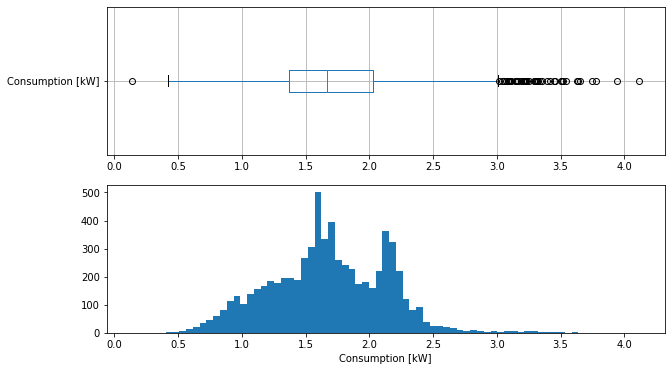

In [ ]:
boxHist(df_5min, 'Consumption [kW]')

['Solar [kW]']

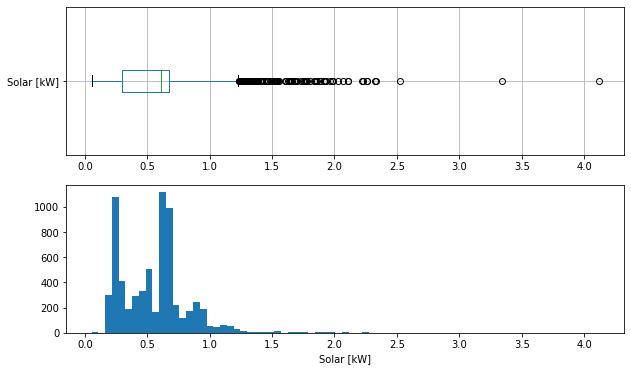

In [ ]:
boxHist(df_5min, 'Solar [kW]')

['Always on [kW]']

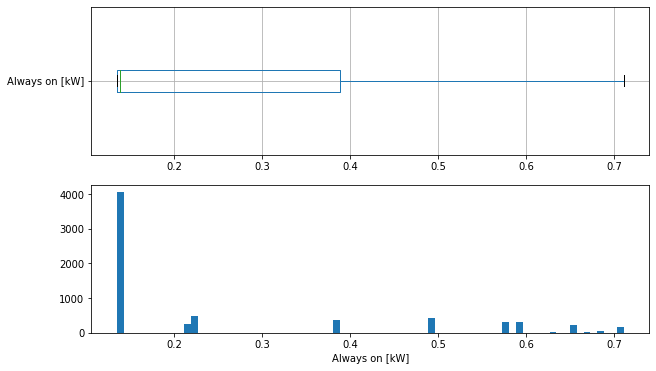

In [ ]:
boxHist(df_5min, 'Always on [kW]')

In [ ]:
## convert date to datetime and create date attribute
df_5min = date_cols(df_5min, 'Date')

In [ ]:
df_5min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6696 entries, 0 to 6695
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              6696 non-null   object 
 1   Consumption [kW]  6696 non-null   float64
 2   Solar [kW]        6696 non-null   float64
 3   Always on [kW]    6696 non-null   float64
 4   Import [kW]       6696 non-null   float64
 5   Export [kW]       6696 non-null   float64
 6   Year              6696 non-null   int64  
 7   Month             6696 non-null   int64  
 8   Day               6696 non-null   int64  
 9   weekday           6696 non-null   int64  
 10  weekday_name      6696 non-null   object 
 11  Hour              6696 non-null   int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 627.9+ KB


In [ ]:
print(f'This data is for {df_5min.Year.max() - df_5min.Year.min()} years')

This data is for 0 years


In [ ]:
print(f'This data is for {df_5min.Month.max() - df_5min.Month.min()} month')

This data is for 1 month


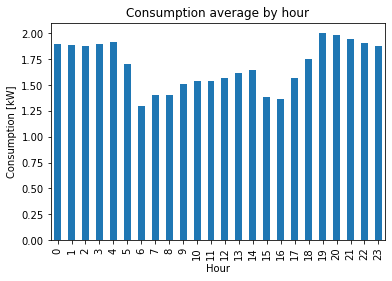

In [ ]:
## Average consumption by Hour
plots(df_5min, 'Hour' , 'Consumption [kW]', np.mean, 'Consumption average by hour', t = 'bar')

High consumption during the night probably a manufactory company


In [ ]:
valCount(df_5min, 'Month', perc = False)

1    5848
2     848
Name: Month, dtype: int64

In [ ]:
valCount(df_5min, 'weekday_name', perc = False)

Tuesday      1251
Sunday       1029
Monday       1021
Thursday      904
Saturday      871
Wednesday     863
Friday        757
Name: weekday_name, dtype: int64

In [ ]:
df_5min['Date'] = pd.to_datetime(df_5min['Date'])

In [ ]:
df_5min.Date.max(), df_5min.Date.min()

(Timestamp('2021-02-05 11:30:00'), Timestamp('2021-01-05 00:00:00'))

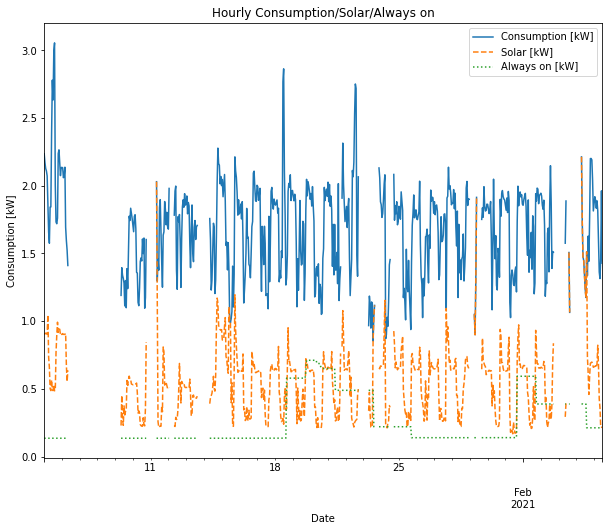

In [ ]:
df_5min1 = df_5min.set_index('Date')
df_5min1[['Consumption [kW]', 'Solar [kW]', 'Always on [kW]']].resample('H').mean().plot(style=['-', '--', ':'], figsize=(10, 8))
plt.ylabel('Consumption [kW]')
plt.title('Hourly Consumption/Solar/Always on');

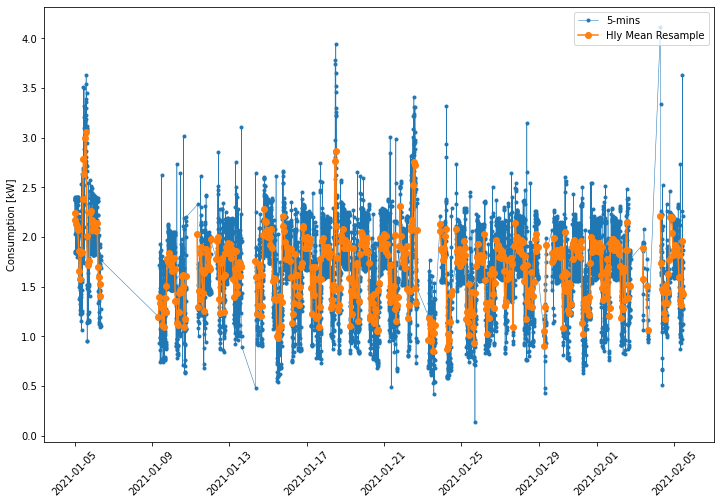

In [ ]:
DataandResampling(df_5min, 'Date', 'Consumption [kW]', 'H', '5-mins')

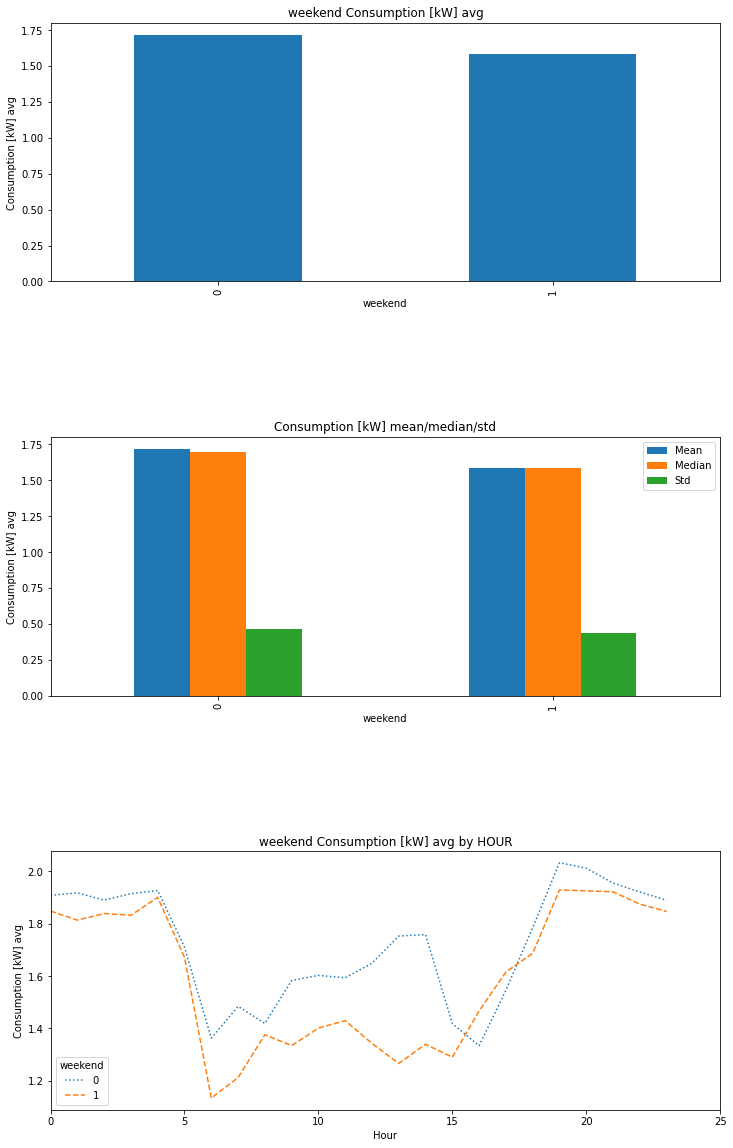

In [ ]:
## weekend
TSAggregationEda(df_5min, 'Date', 'Consumption [kW]', 'weekend')

Same pattern during weekday and weekend

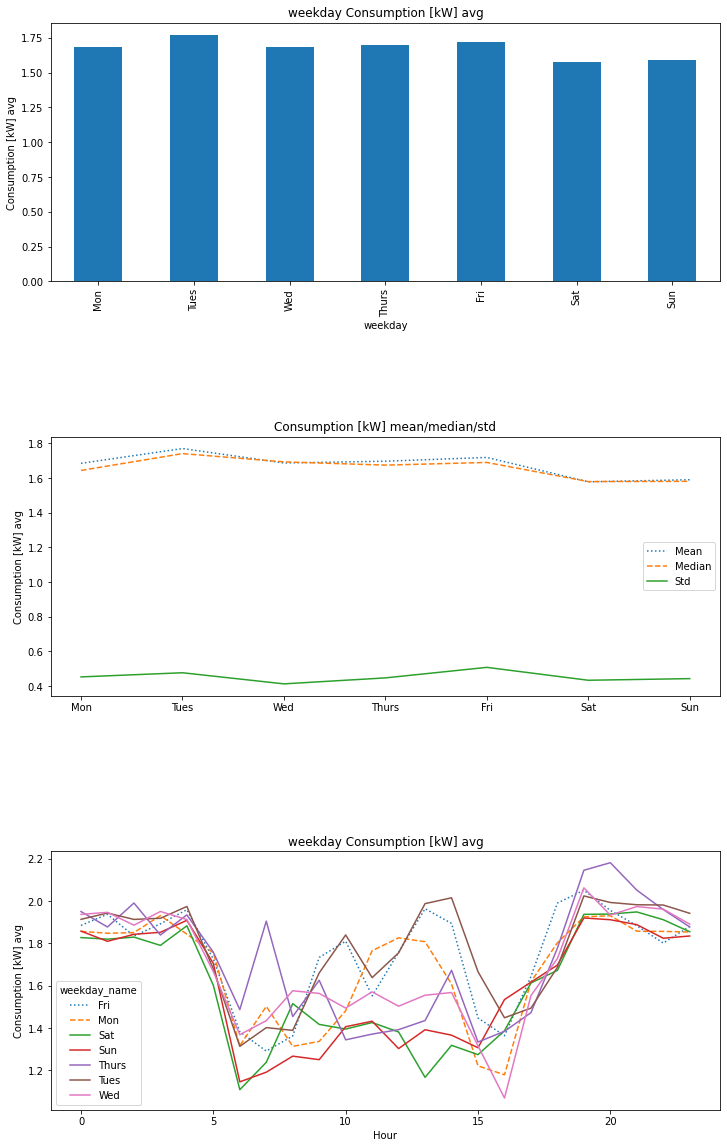

In [ ]:
TSAggregationEda(df_5min, 'Date', 'Consumption [kW]', 'weekday')

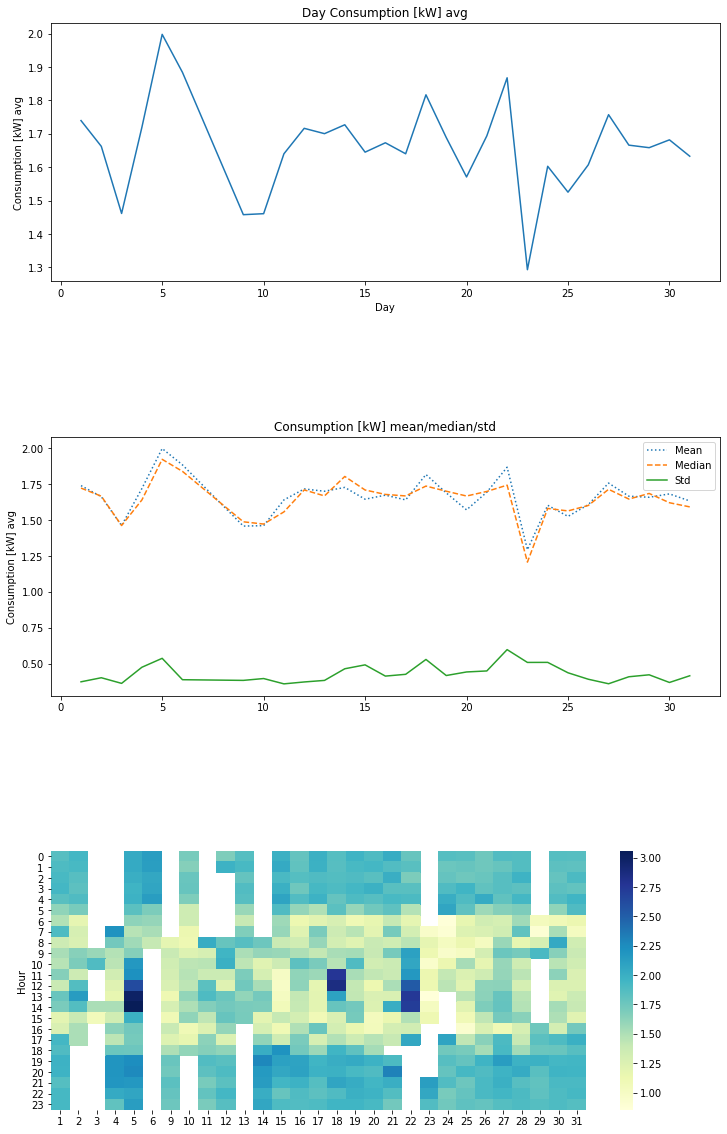

In [ ]:
TSAggregationEda(df_5min, 'Date', 'Consumption [kW]', 'Day')

We have some missing days

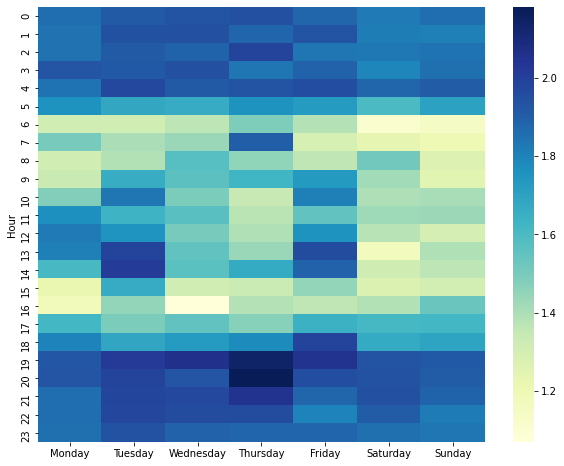

In [ ]:
heatmapGroupby(df_5min, 'Date', 'Consumption [kW]', 'Hour' , 'weekday_name', np.mean)

## EDA OF Puma Rhodesville usage daily


In [ ]:
df_day.head()

,Date,Consumption [kWh],Solar [kWh],Always on [kWh],Import [kWh],Export [kWh]
0,2021-02-05 00:00:00,19.751756,6.176332,2.446,13.575123,0
1,2021-02-04 00:00:00,26.934841,16.142239,4.307,10.793501,0
2,2021-02-03 00:00:00,3.532146,1.964092,0.937,1.567753,0
3,2021-02-02 00:00:00,29.922517,8.705301,6.977,21.217215,0
4,2021-02-01 00:00:00,40.009467,12.205472,12.423,27.803995,0


In [ ]:
info_data(df_day, info = True, head = True, shape = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               271 non-null    object 
 1   Consumption [kWh]  271 non-null    float64
 2   Solar [kWh]        271 non-null    float64
 3   Always on [kWh]    271 non-null    float64
 4   Import [kWh]       271 non-null    float64
 5   Export [kWh]       271 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 12.8+ KB
--------------------------------------------------------------------
First rows
                  Date  Consumption [kWh]  ...  Import [kWh]  Export [kWh]
0  2021-02-05 00:00:00          19.751756  ...     13.575123             0
1  2021-02-04 00:00:00          26.934841  ...     10.793501             0
2  2021-02-03 00:00:00           3.532146  ...      1.567753             0
3  2021-02-02 00:00:00          29.922517  ...     21.217215         

Only 271 records, not enough for ML but ok for EDA

In [ ]:
df_day.nunique()

Date                 271
Consumption [kWh]    266
Solar [kWh]          266
Always on [kWh]      252
Import [kWh]         265
Export [kWh]           1
dtype: int64

In [ ]:
describe(df_day)

,Consumption [kWh],Solar [kWh],Always on [kWh],Import [kWh],Export [kWh]
count,271.000000,271.000000,271.000000,271.000000,271.0
mean,36.377365,11.109967,9.320092,25.267374,0.0
std,13.148334,4.552466,6.765134,9.826843,0.0
min,0.000000,-7.145184,0.000000,0.000000,0.0
25%,32.432644,9.327240,4.241500,22.570467,0.0
median,37.412723,11.078682,8.458000,25.134975,0.0
75%,42.865239,13.792155,12.331000,29.642139,0.0
max,70.464118,21.403736,35.683000,54.638132,0.0


The consumption go from 0 to 70 KW with a mean of 36.38 KW, differnt range from 5min data. Why?

['Consumption [kWh]']

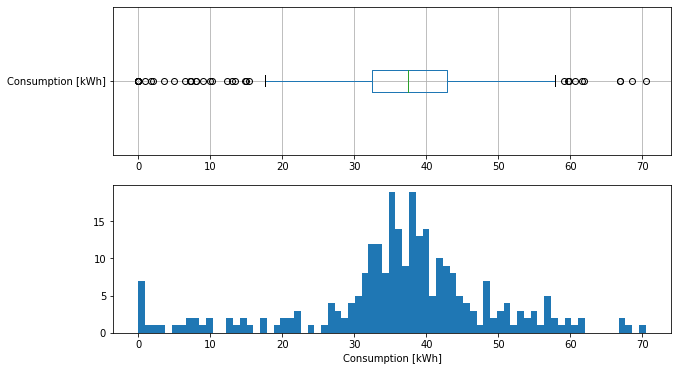

In [ ]:
boxHist(df_day, 'Consumption [kWh]')

In [ ]:
print(f'This data is for {df_day.Month.max() - df_day.Month.min()} months')

This data is for 11 months


In [ ]:
df_day.nunique()

Date                 271
Consumption [kWh]    266
Solar [kWh]          266
Always on [kWh]      252
Import [kWh]         265
Export [kWh]           1
Year                   2
Month                 12
Day                   31
weekday                7
weekday_name           7
Hour                   1
weekend                2
season                 4
Month_name             0
dtype: int64

In [ ]:
df_day.head()

,Date,Consumption [kWh],Solar [kWh],Always on [kWh],Import [kWh],Export [kWh],Year,Month,Day,weekday,weekday_name,Hour
0,2021-02-05 00:00:00,19.751756,6.176332,2.446,13.575123,0,2021,2,5,4,Friday,0
1,2021-02-04 00:00:00,26.934841,16.142239,4.307,10.793501,0,2021,2,4,3,Thursday,0
2,2021-02-03 00:00:00,3.532146,1.964092,0.937,1.567753,0,2021,2,3,2,Wednesday,0
3,2021-02-02 00:00:00,29.922517,8.705301,6.977,21.217215,0,2021,2,2,1,Tuesday,0
4,2021-02-01 00:00:00,40.009467,12.205472,12.423,27.803995,0,2021,2,1,0,Monday,0


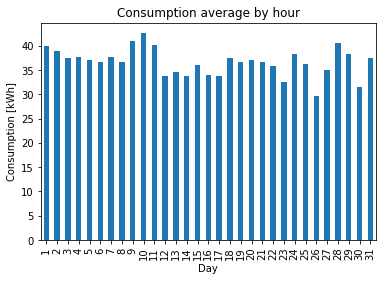

In [ ]:
## Average consumption by Hour
## convert date to datetime and create date attribute
df_day = date_cols(df_day, 'Date')
plots(df_day, 'Day' , 'Consumption [kWh]', np.mean, 'Consumption average by hour', t = 'bar')

In [ ]:
valCount(df_day, 'Month', perc = False)

8     31
7     31
6     30
1     29
9     27
12    26
11    26
5     24
3     18
4     16
10     8
2      5
Name: Month, dtype: int64

In [ ]:
valCount(df_day, 'weekday_name', perc = False)

Wednesday    41
Thursday     41
Tuesday      39
Friday       39
Sunday       37
Saturday     37
Monday       37
Name: weekday_name, dtype: int64

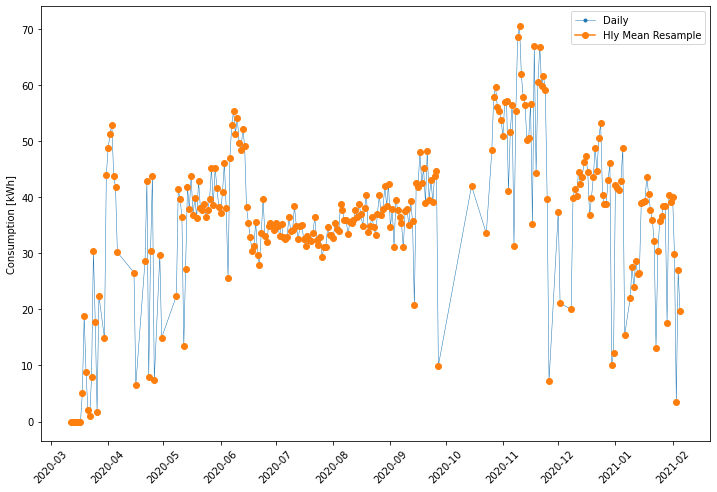

In [ ]:
DataandResampling(df_day, 'Date', 'Consumption [kWh]', 'H', 'Daily')

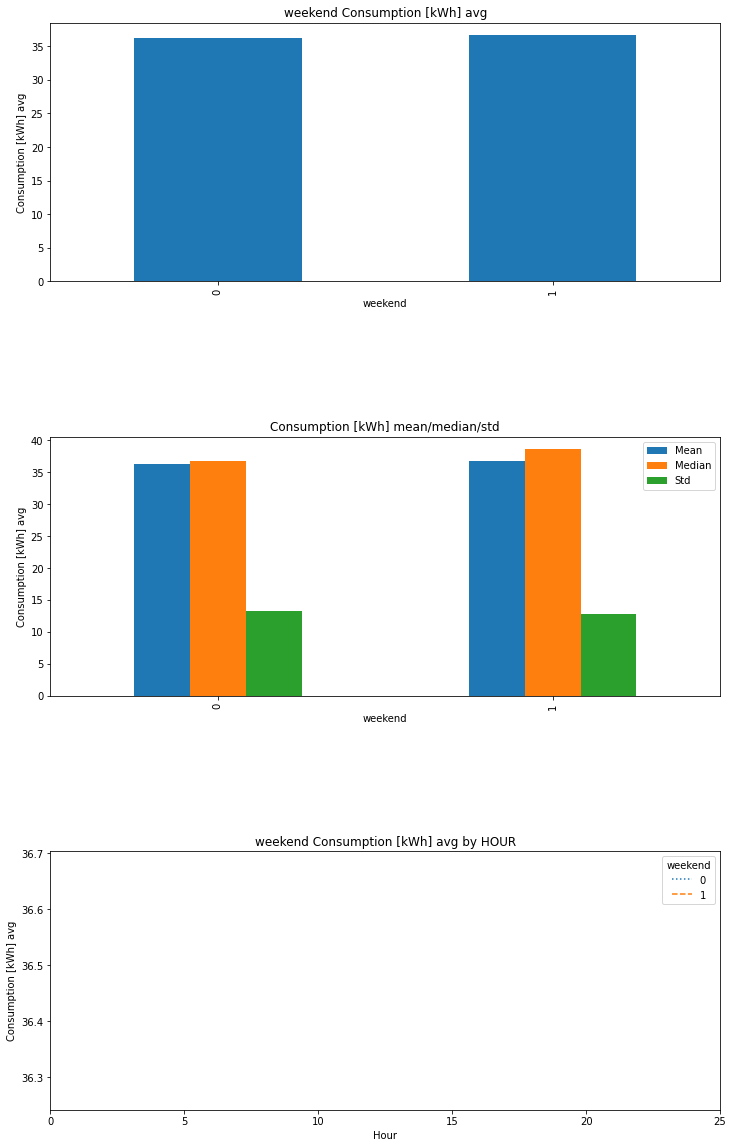

In [ ]:
## weekend
TSAggregationEda(df_day, 'Date', 'Consumption [kWh]', 'weekend')

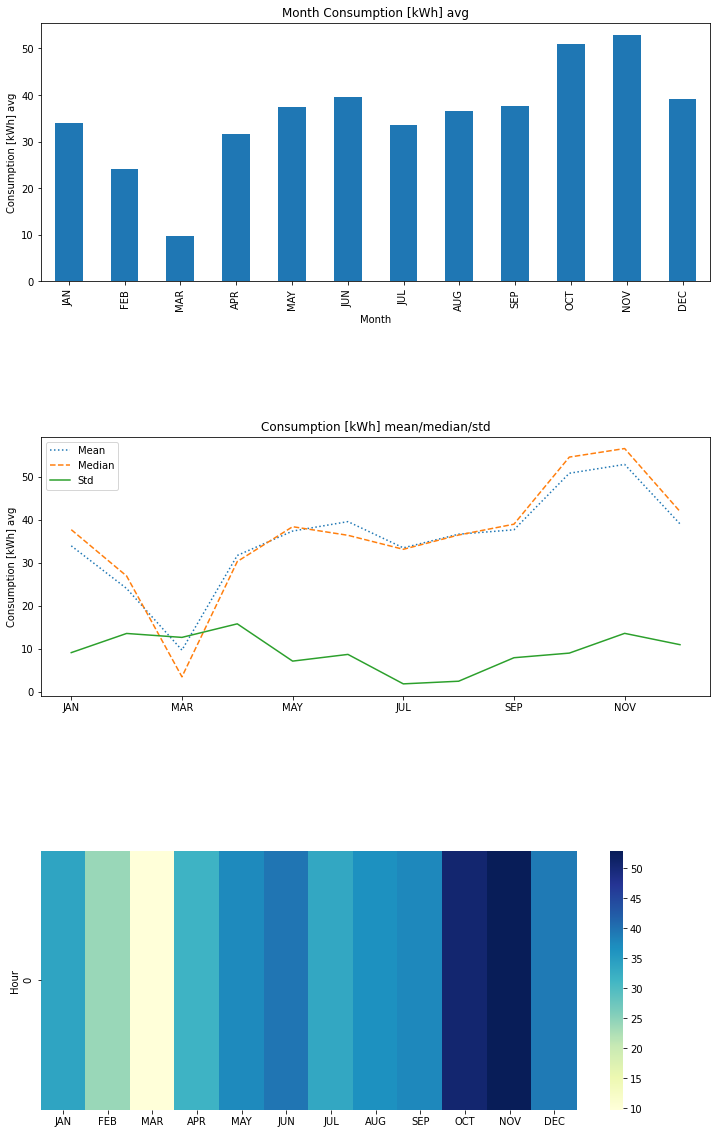

In [ ]:
## month
TSAggregationEda(df_day, 'Date', 'Consumption [kWh]', 'Month')

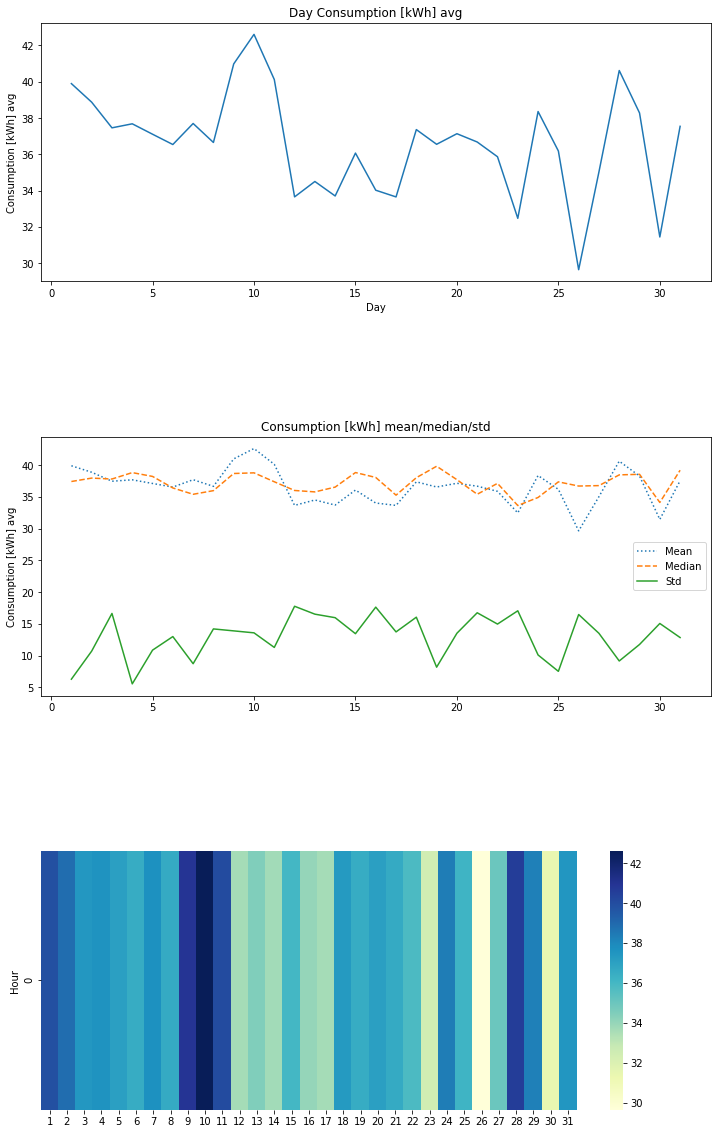

In [ ]:
TSAggregationEda(df_day, 'Date', 'Consumption [kWh]', 'Day')

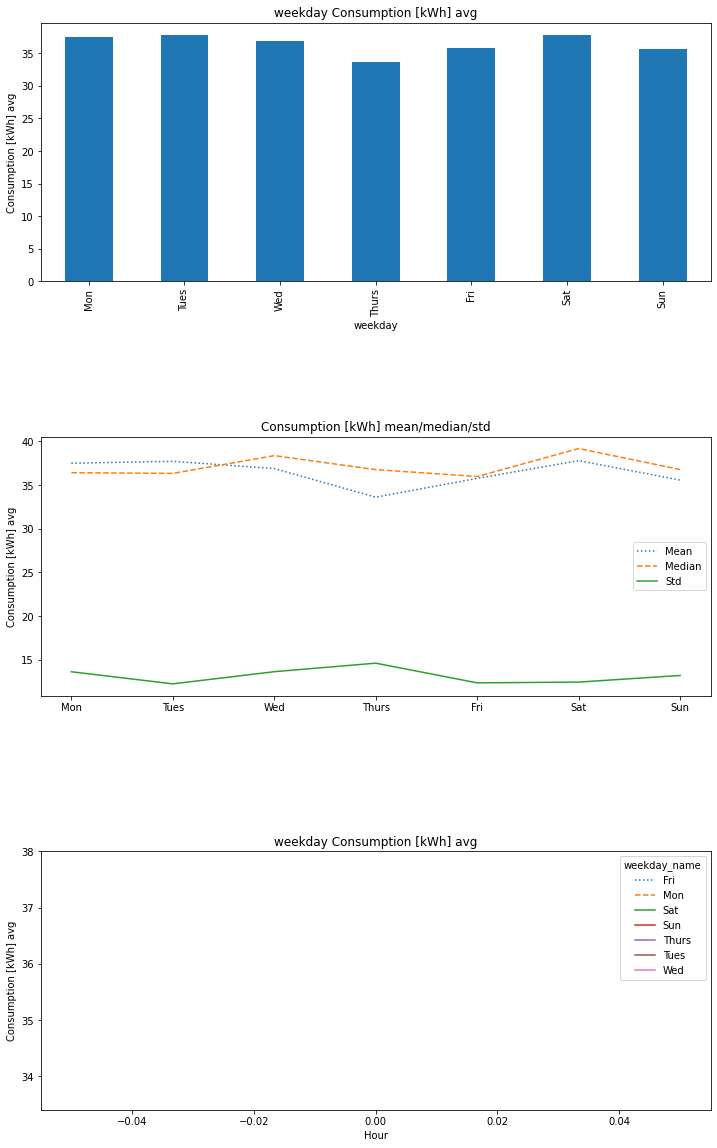

In [ ]:
TSAggregationEda(df_day, 'Date', 'Consumption [kWh]', 'weekday')

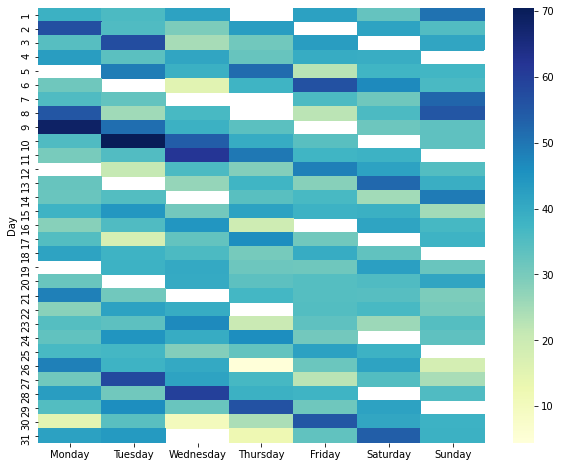

In [ ]:
heatmapGroupby(df_day, 'Date', 'Consumption [kWh]', 'Day' , 'weekday_name', np.mean)

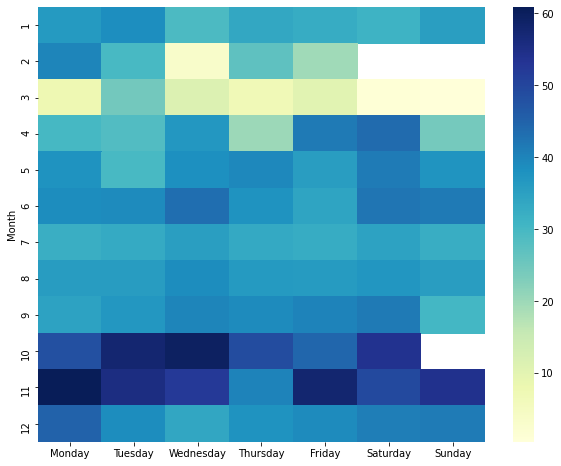

In [ ]:
heatmapGroupby(df_day, 'Date', 'Consumption [kWh]', 'Month' , 'weekday_name', np.mean)

## EDA OF Puma Rhodesville usage Hourly

In [ ]:
df_hour.head()

,Date,Consumption [kWh],Solar [kWh],Always on [kWh],Import [kWh],Export [kWh]
0,2021-02-05 11:00:00,0.833053,0.126712,0.123,0.706341,0.0
1,2021-02-05 10:00:00,1.962823,0.215220,0.211,1.747502,0.0
2,2021-02-05 09:00:00,1.464109,0.216495,0.211,1.247414,0.0
3,2021-02-05 08:00:00,1.314607,0.358430,0.211,0.955877,0.0
4,2021-02-05 07:00:00,1.363642,0.425666,0.211,0.937975,0.0


In [ ]:
info_data(df_hour, info = True, head = False, shape = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1672 non-null   object 
 1   Consumption [kWh]  1672 non-null   float64
 2   Solar [kWh]        1672 non-null   float64
 3   Always on [kWh]    1672 non-null   float64
 4   Import [kWh]       1672 non-null   float64
 5   Export [kWh]       1672 non-null   float64
dtypes: float64(5), object(1)
memory usage: 78.5+ KB
--------------------------------------------------------------------
First rows
--------------------------------------------------------------------
Dimension of the data
This data has 1672 rows and 6 variables


In [ ]:
df_hour.nunique()

Date                 1672
Consumption [kWh]    1672
Solar [kWh]          1669
Always on [kWh]       125
Import [kWh]         1634
Export [kWh]            2
dtype: int64

In [ ]:
describe(df_hour)

,Consumption [kWh],Solar [kWh],Always on [kWh],Import [kWh],Export [kWh]
count,1672.000000,1672.000000,1672.000000,1672.000000,1.672000e+03
mean,1.901966,0.640760,0.472626,1.261202,1.196172e-09
std,0.578985,0.261568,0.419539,0.559404,3.457537e-08
min,0.085677,0.018284,0.011000,0.000000,0.000000e+00
25%,1.542714,0.465954,0.139000,0.992526,0.000000e+00
median,1.875601,0.634669,0.218000,1.195479,0.000000e+00
75%,2.146801,0.865099,0.871000,1.394840,0.000000e+00
max,4.940851,2.029139,1.508000,4.466165,1.000000e-06


The range is similar to 5mins

['Consumption [kWh]']

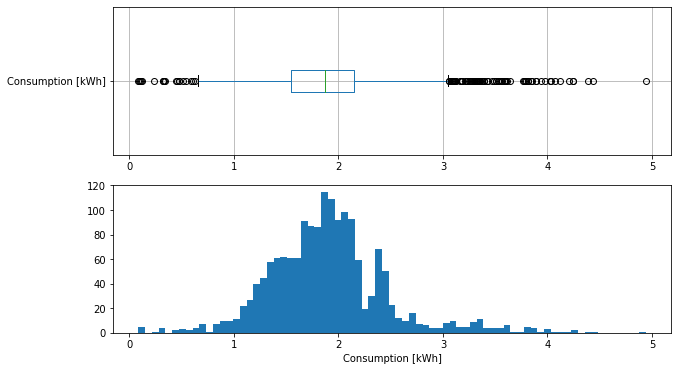

In [ ]:
boxHist(df_hour, 'Consumption [kWh]')

['Solar [kWh]']

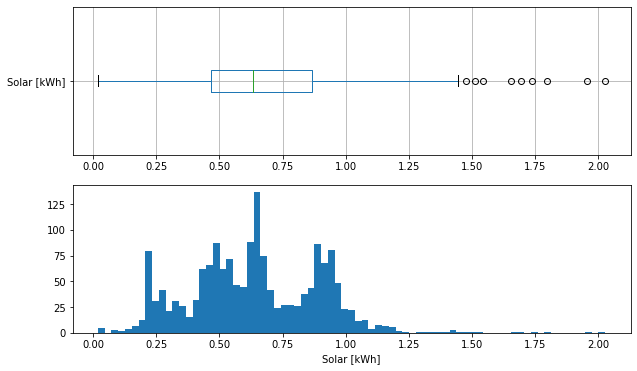

In [ ]:
boxHist(df_hour, 'Solar [kWh]')

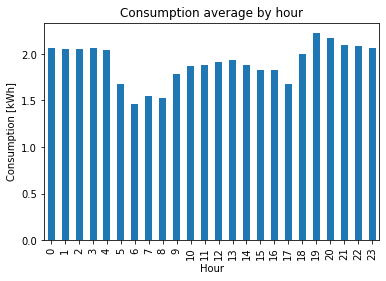

In [ ]:
## Average consumption by Hour
## convert date to datetime and create date attribute
df_hour = date_cols(df_hour, 'Date')
plots(df_hour, 'Hour' , 'Consumption [kWh]', np.mean, 'Consumption average by hour', t = 'bar')

In [ ]:
valCount(df_hour, 'Month', perc = False)

1     603
12    554
11    440
2      75
Name: Month, dtype: int64

In [ ]:
valCount(df_hour, 'weekday_name', perc = False)

Tuesday      277
Monday       256
Sunday       255
Saturday     233
Wednesday    231
Thursday     210
Friday       210
Name: weekday_name, dtype: int64

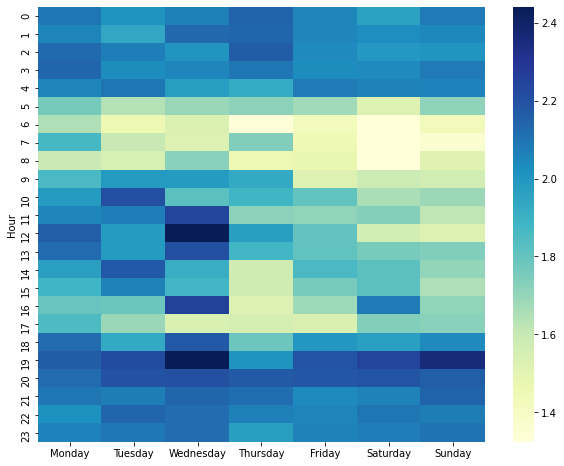

In [ ]:
heatmapGroupby(df_hour, 'Date', 'Consumption [kWh]', 'Hour' , 'weekday_name', np.mean)

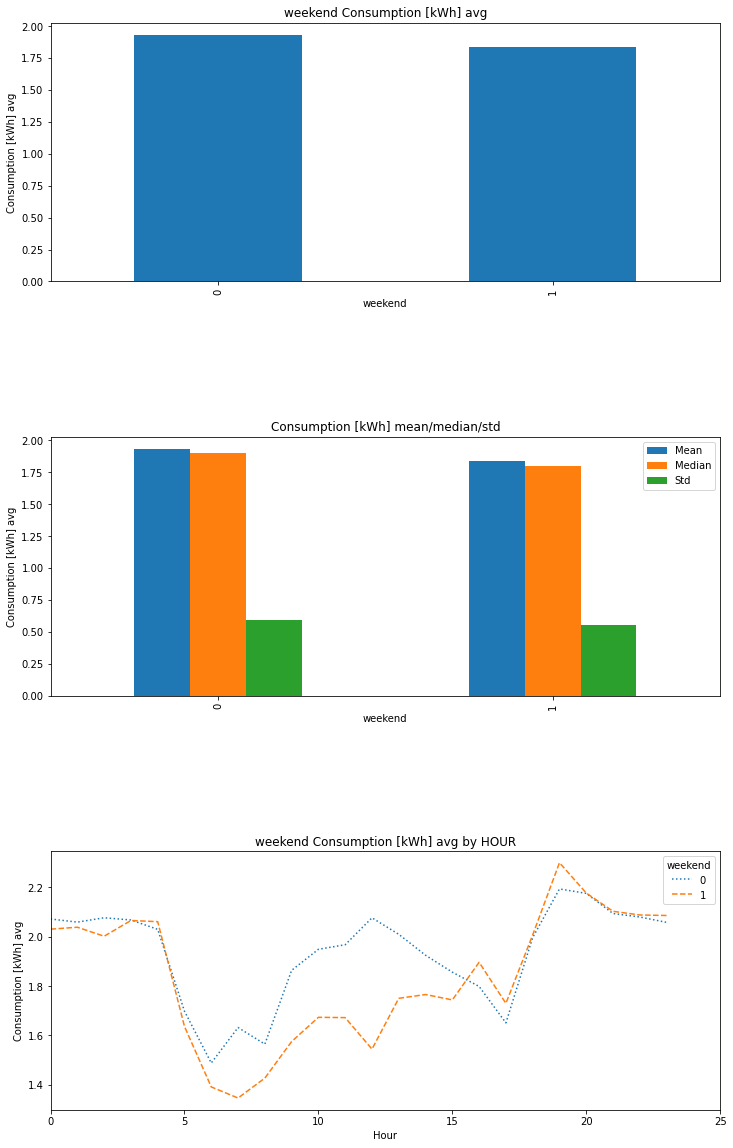

In [ ]:
TSAggregationEda(df_hour, 'Date', 'Consumption [kWh]', 'weekend')

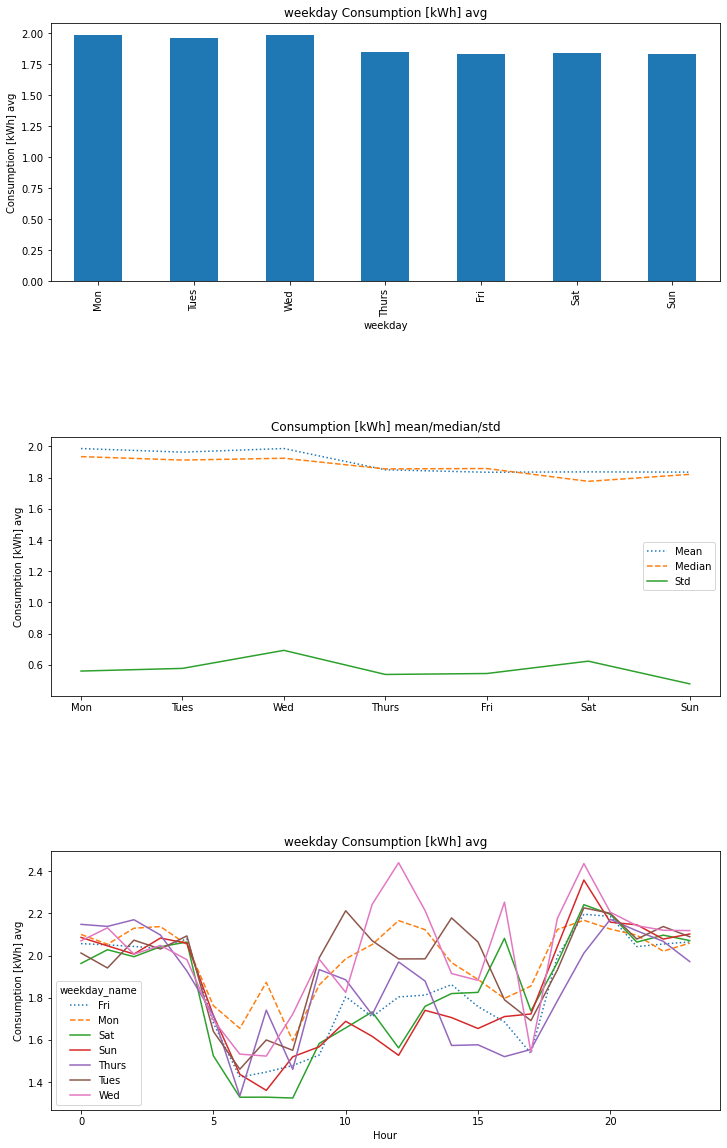

In [ ]:
TSAggregationEda(df_hour, 'Date', 'Consumption [kWh]', 'weekday')

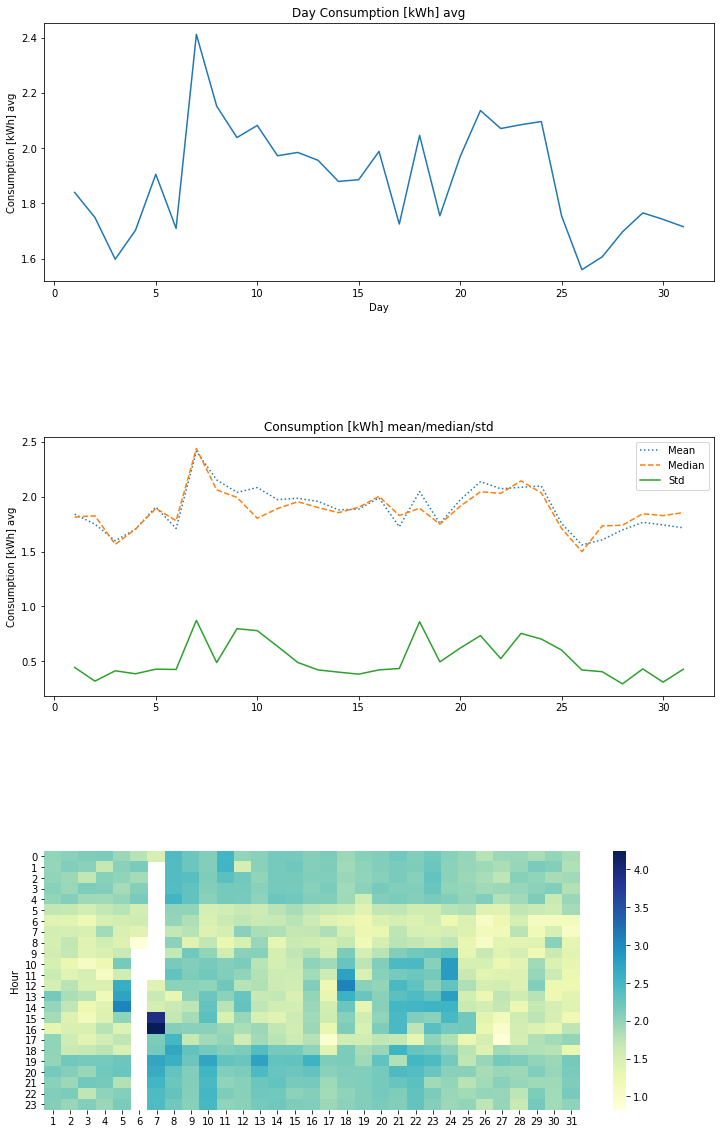

In [ ]:
TSAggregationEda(df_hour, 'Date', 'Consumption [kWh]', 'Day')